In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### data cleaning

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
original_data = data.copy()

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
missing = [col for col in data.columns if data[col].isna().sum()>0]

In [7]:
nan_percent = []
for col in missing:
    percent = data[col].isna().sum()/len(data)
    nan_percent.append(round(percent,3))


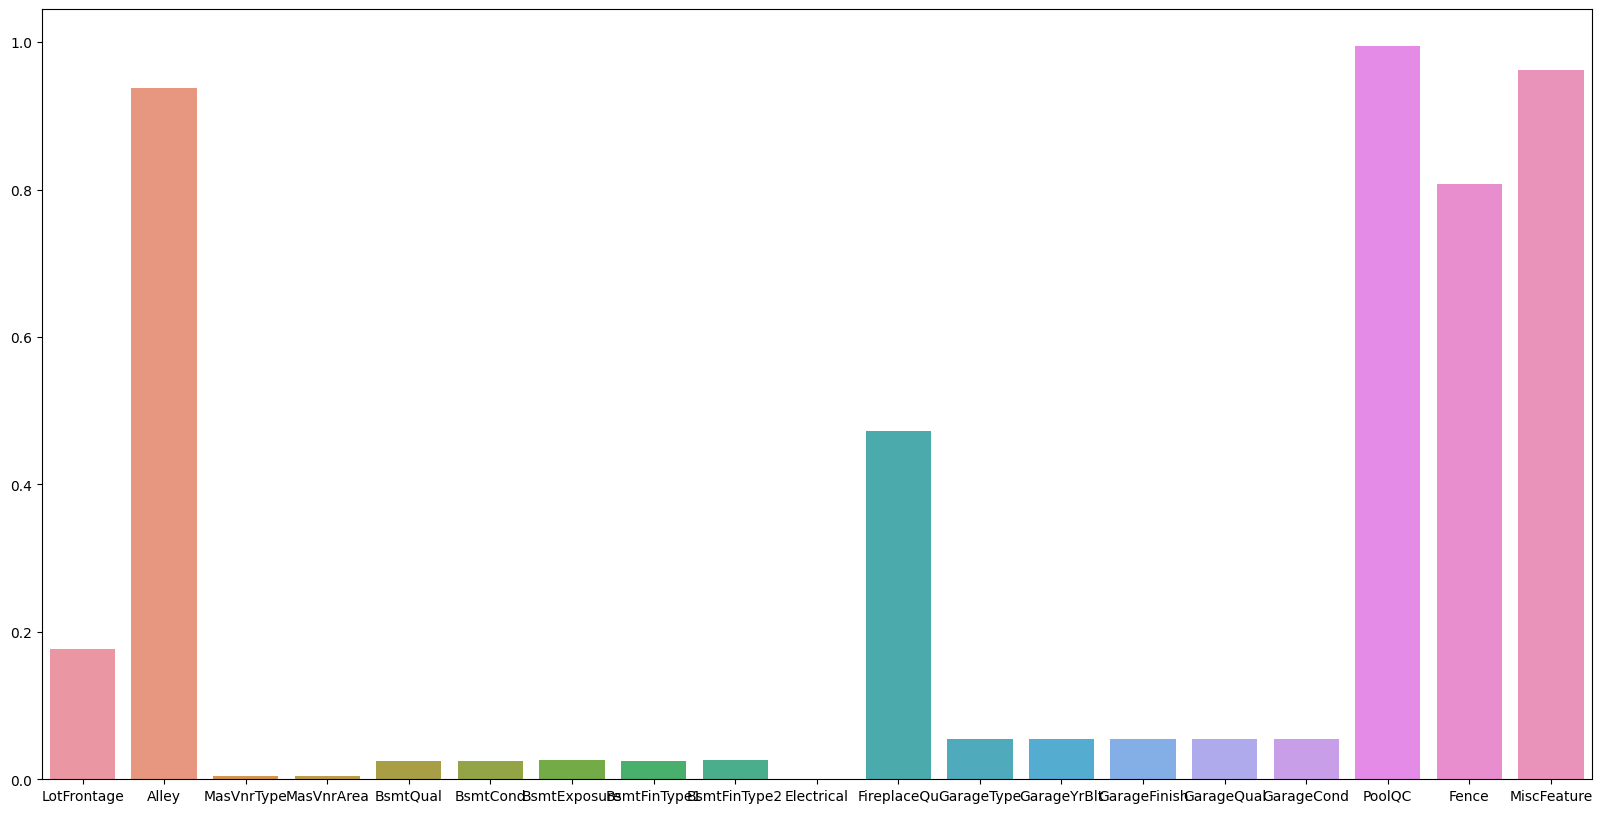

In [8]:
plt.figure(figsize = (20,10))
sns.barplot(x = missing,y = nan_percent)
plt.show()

In [9]:
categorical_cols = [col for col in data.columns if data[col].dtype=="O"]
numeric_cols = [col for col in data.columns if data[col].dtype!="O"]

In [10]:
len(categorical_cols),len(numeric_cols)

(43, 38)

In [11]:
nan_cate = [col for col in categorical_cols if data[col].isna().sum()>0]
nan_num = [col for col in numeric_cols if data[col].isna().sum()>0]

In [12]:
len(nan_cate),len(nan_num)

(16, 3)

In [13]:
data["LotFrontage"].median()

69.0

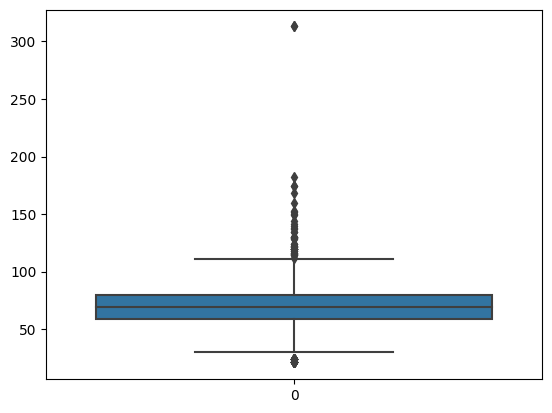

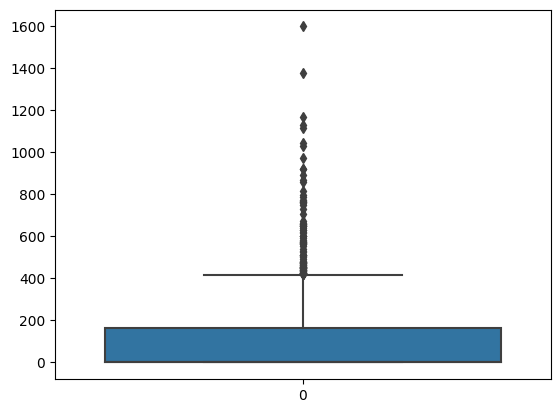

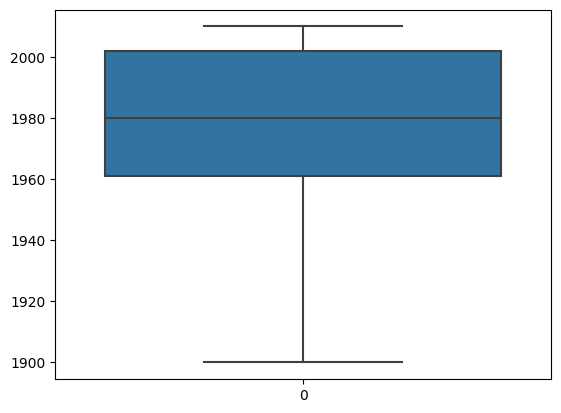

In [14]:
for feature in nan_num:
    sns.boxplot(data[feature])
    plt.show()

In [15]:
for feature in nan_num:
    
    median = data[feature].median()
    data[feature].fillna(median,inplace = True)


In [16]:
for col in nan_cate:
    data[col] = data[col].fillna("Missing")

In [17]:
data[missing].isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

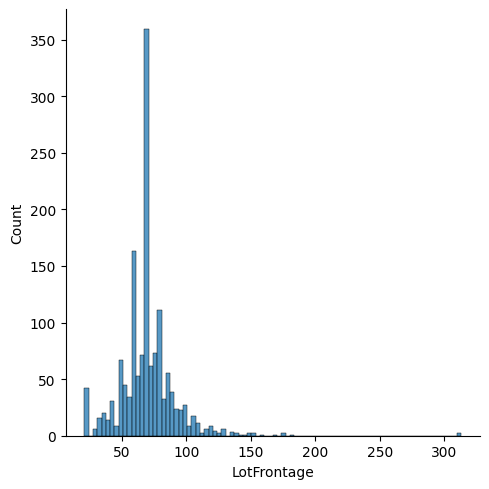

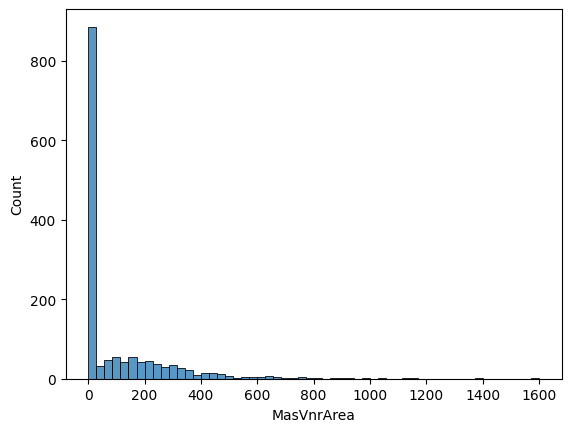

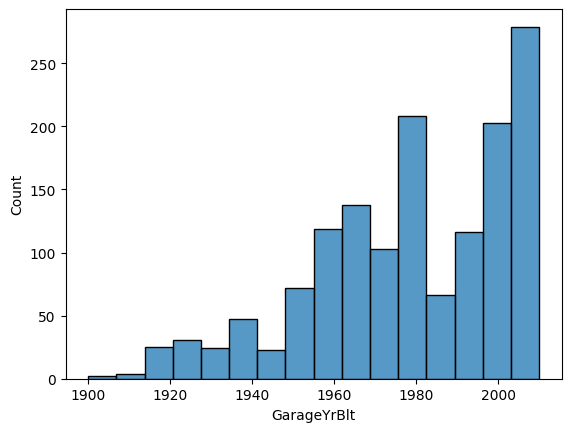

In [18]:
sns.displot(data=data['LotFrontage'])
plt.show()
sns.histplot(data=data['MasVnrArea'])
plt.show()
sns.histplot(data=data['GarageYrBlt'])
plt.show()


In [19]:
skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in skew_features:
    data[feature] = np.log(data[feature])


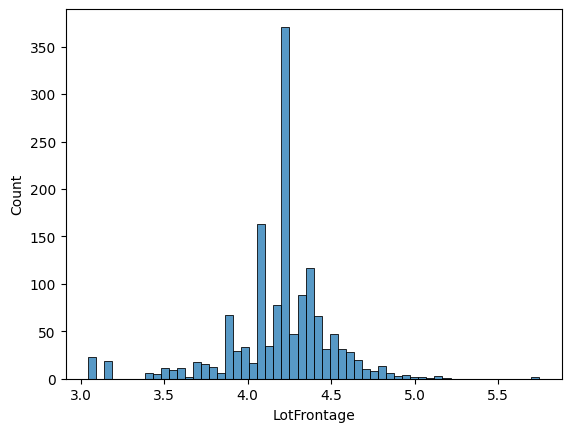

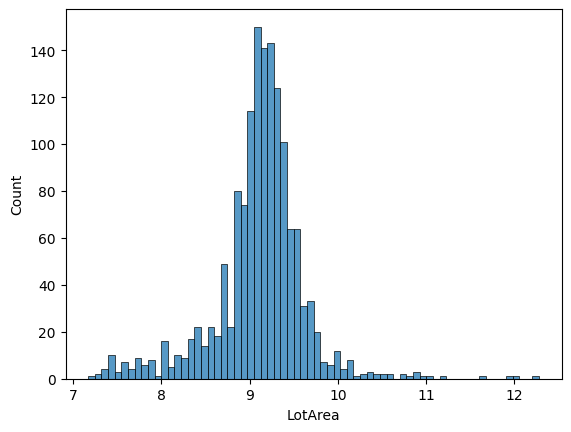

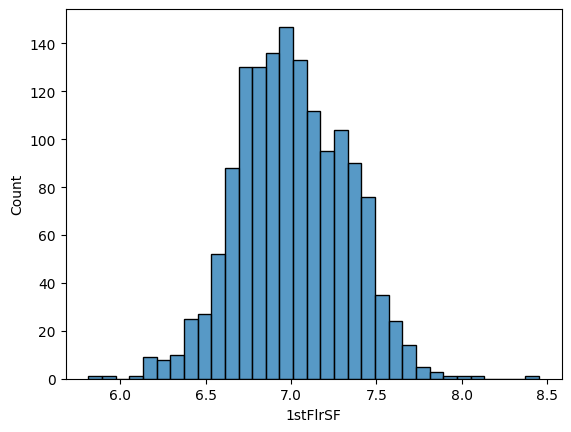

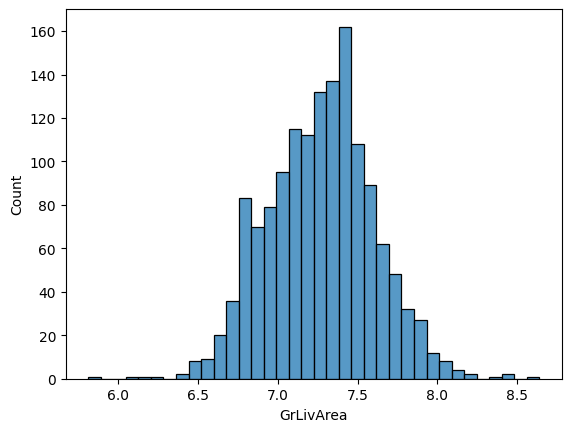

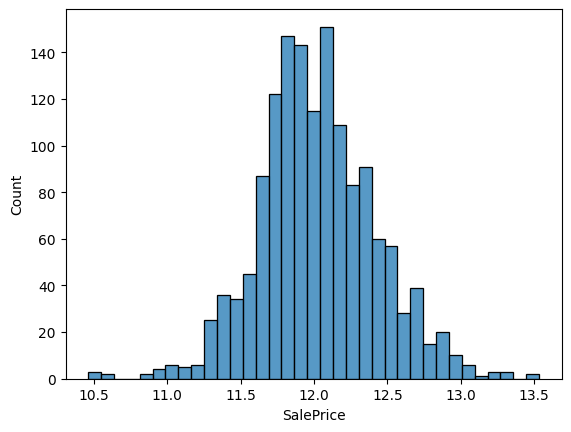

In [20]:
for col in skew_features:
    sns.histplot(data=data[col])
    plt.show()

### converting categorical features into numbers

In [21]:
high_coun = []
low_coun = []
for feature in categorical_cols:
    if data[feature].nunique()>3:
        high_coun.append(feature)
    else:
        low_coun.append(feature)


In [22]:
len(high_coun),len(low_coun)

(37, 6)

In [23]:
low_coun

['Street', 'Alley', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive']

In [24]:
data['Street'] = data['Street'].map({'Pave':0,'Grvl':1})
data['Alley'] = data['Alley'].map({'Missing':0 ,'Grvl':1, 'Pave':2})
data['Utilities'] = data['Utilities'].map({'AllPub':0 , 'NoSeWa':1})
data['LandSlope'] = data['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
data['CentralAir'] = data['CentralAir'].map({'Y':0,'N':1})
data['PavedDrive']  = data['PavedDrive'].map({'Y':0,'N':1, 'P':2})

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in high_coun:
    data[col] = le.fit_transform(data[col])

In [26]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,0,0,3,3,0,...,0,3,2,1,0,2,2008,8,4,12.247694
1,2,20,3,4.382027,9.169518,0,0,3,3,0,...,0,3,2,1,0,5,2007,8,4,12.109011
2,3,60,3,4.219508,9.328123,0,0,0,3,0,...,0,3,2,1,0,9,2008,8,4,12.317167
3,4,70,3,4.094345,9.164296,0,0,0,3,0,...,0,3,2,1,0,2,2006,8,0,11.849398
4,5,60,3,4.430817,9.565214,0,0,0,3,0,...,0,3,2,1,0,12,2008,8,4,12.429216


In [27]:
x = data.drop(["SalePrice","Id"],axis = 1)
y = data['SalePrice']

In [28]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,4.174387,9.041922,0,0,3,3,0,4,...,0,0,3,2,1,0,2,2008,8,4
1,20,3,4.382027,9.169518,0,0,3,3,0,2,...,0,0,3,2,1,0,5,2007,8,4
2,60,3,4.219508,9.328123,0,0,0,3,0,4,...,0,0,3,2,1,0,9,2008,8,4
3,70,3,4.094345,9.164296,0,0,0,3,0,0,...,0,0,3,2,1,0,2,2006,8,0
4,60,3,4.430817,9.565214,0,0,0,3,0,2,...,0,0,3,2,1,0,12,2008,8,4


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=0)

In [31]:
x[missing].isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [32]:
x_train

array([[ 0.30985939,  1.53724502, -0.32577815, ...,  0.8919936 ,
         0.31386709,  0.2085023 ],
       [ 0.54634382, -0.04553194,  0.110587  , ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.54634382, -0.04553194,  0.110587  , ..., -1.36765473,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.78282825,  1.53724502,  0.06500658, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.49228154, -0.04553194,  0.110587  , ..., -1.36765473,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194, -0.43162567, ...,  1.64520971,
         0.31386709,  0.2085023 ]])

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred_linear = linear_model.predict(x_test)

In [34]:
y_pred = model.predict(x_test)

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(max_depth=1)  
n_estimators = 100
adaboost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators)

adaboost.fit(x_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  n_estimators=100)

In [51]:
y_pred_adaboost = adaboost.predict(x_test)

ADABOOST SCORE :  0.6088124310529435


In [52]:
from sklearn.metrics import r2_score

score_random = r2_score(y_pred,y_test)
score_linear = r2_score(y_pred_linear,y_test)
adaboost_score = r2_score(y_pred_adaboost,y_test)

print("score for random forest : ",score_random)
print("score for linear regression : ",score_linear)
print("ADABOOST SCORE : ",adaboost_score)

score for random forest :  0.8695776779850986
score for linear regression :  0.7913708523619035
ADABOOST SCORE :  0.6088124310529435


### by observing the all scores Random forest regression is best approach